Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_file = '/content/drive/MyDrive/Time Series Econometrics/NFLX.csv'
ntflx = pd.read_csv(path_file)

Basic Exploration

In [ ]:
ntflx.shape

(1009, 7)

In [ ]:
ntflx.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
ntflx.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
ntflx.duplicated().sum()

np.int64(0)

In [ ]:
ntflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
ntflx.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)

In [ ]:
ntflx.head()

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001


In [ ]:
ntflx.Date=pd.to_datetime(ntflx.Date)
ntflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Adj Close  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


Stationarity Checking

In [ ]:
from scipy import stats
BCTester=ntflx['Adj Close']
ntflx['Adj_Close_BoxCox'], best_lambda = stats.boxcox(BCTester)
print(best_lambda)

-0.3026954915641185


Transformasi LOG


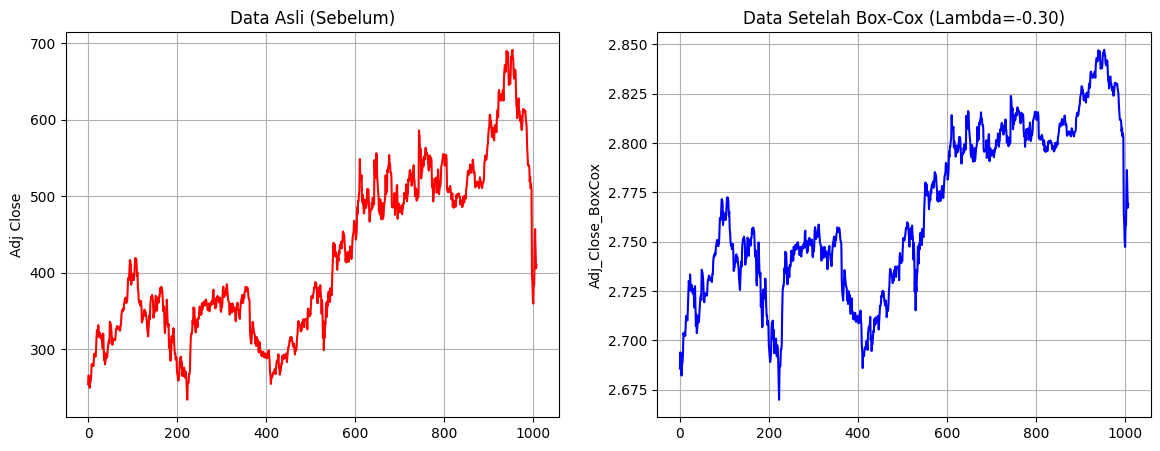

In [ ]:
if -0.5 < best_lambda < 0.5:
    print("Transformasi LOG")
elif 0.8 < best_lambda < 1.2:
    print("Data sudah cukup bagus")
elif 0.3 < best_lambda < 0.7:
    print("Transformasi AKAR KUADRAT")
else:
    print("Transformasi Power (pangkat) sesuai nilai lambda")

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Data Asli
sns.lineplot(data=BCTester, ax=ax[0], color='red')
ax[0].set_title("Data Asli (Sebelum)")
ax[0].grid(True)

# Plot Data Setelah Box-Cox
sns.lineplot(data=ntflx['Adj_Close_BoxCox'], ax=ax[1], color='blue')
ax[1].set_title(f"Data Setelah Box-Cox (Lambda={best_lambda:.2f})")
ax[1].grid(True)

plt.show()

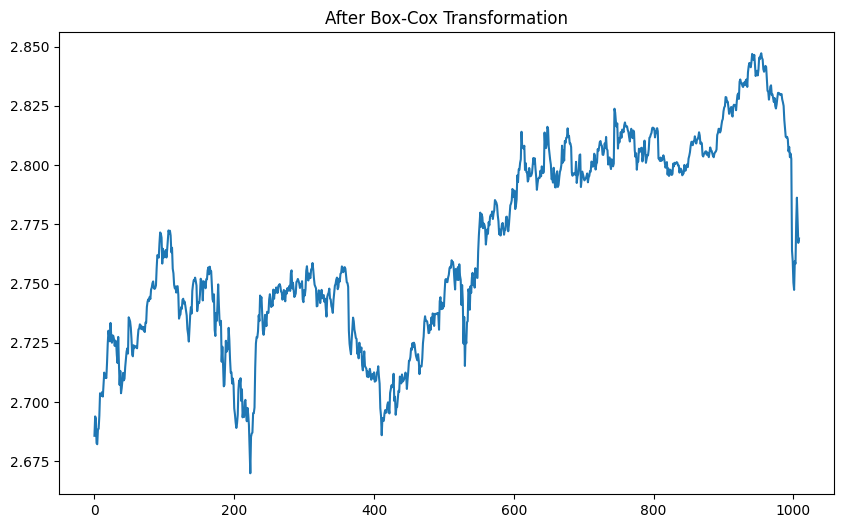

In [ ]:
# Plotting hasil transformasi
plt.figure(figsize=(10, 6))
plt.plot(ntflx['Adj_Close_BoxCox'])
plt.title('After Box-Cox Transformation')
plt.show()

In [ ]:
ntflx.shape

(1009, 3)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf=adfuller(ntflx['Adj_Close_BoxCox'])
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])

ADF Statistic: -2.077067363431148
p-value: 0.2538353394150239


In [ ]:
ntflx['diff_1']=ntflx['Adj_Close_BoxCox'].diff()
ntflx.dropna(inplace=True)

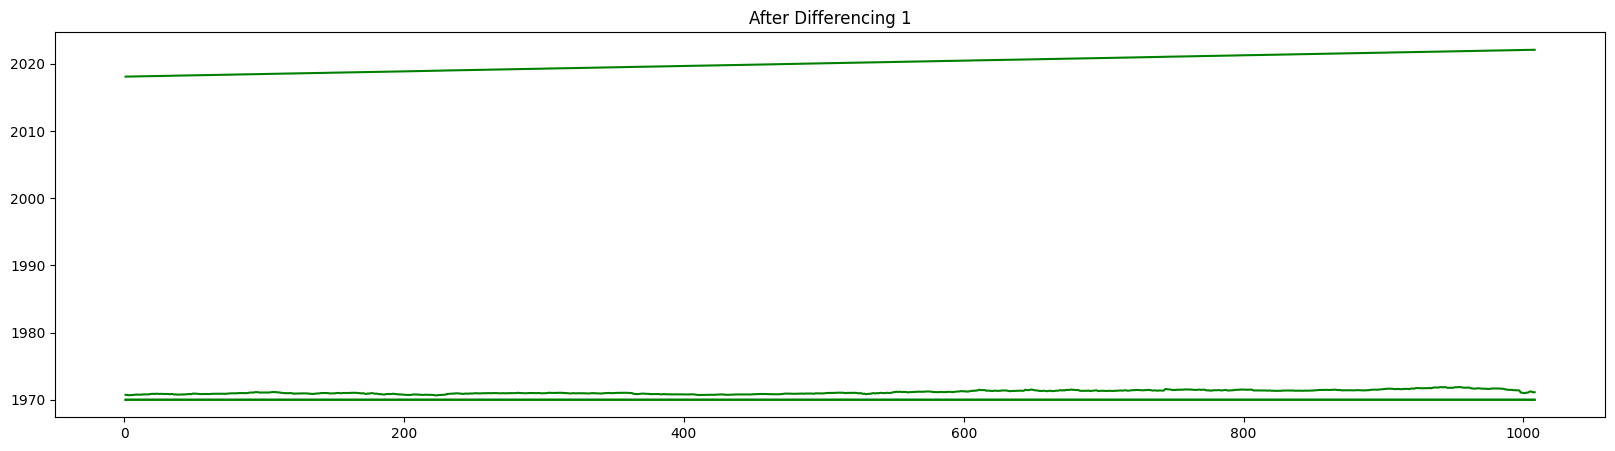

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(ntflx, color='green')
plt.title('After Differencing 1')
plt.show()

In [ ]:
adf1=adfuller(ntflx['diff_1'])
print('ADF Statistic:', adf1[0])
print('p-value:', adf1[1])

ADF Statistic: -14.38209958224297
p-value: 9.11673864065808e-27


In [ ]:
ntflx.shape

(1008, 4)

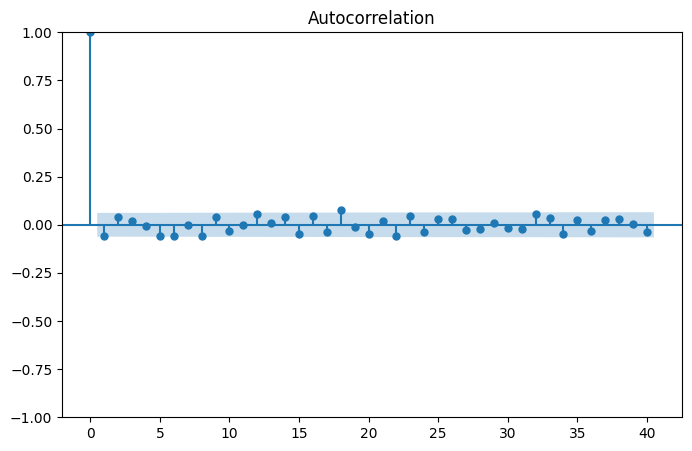

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_acf(ntflx['diff_1'], ax=ax, lags=40)
plt.show()

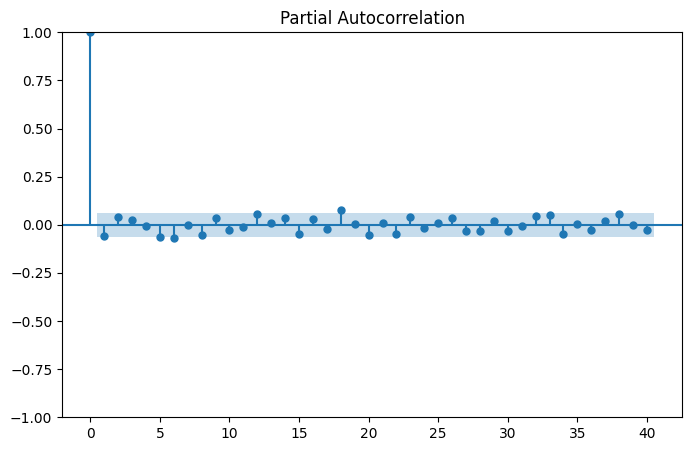

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8, 5))
plot_pacf(ntflx['diff_1'], ax=ax, lags=40)
plt.show()

In [ ]:
train_size = int(len(ntflx) * 0.8)
train_data = ntflx['Adj_Close_BoxCox'][:train_size]
test_data = ntflx['Adj_Close_BoxCox'][train_size:]

print(f"Total Data  : {len(ntflx)}")
print(f"Data Train  : {len(train_data)} baris (80%)")
print(f"Data Test   : {len(test_data)} baris (20%)")

Total Data  : 1008
Data Train  : 806 baris (80%)
Data Test   : 202 baris (20%)


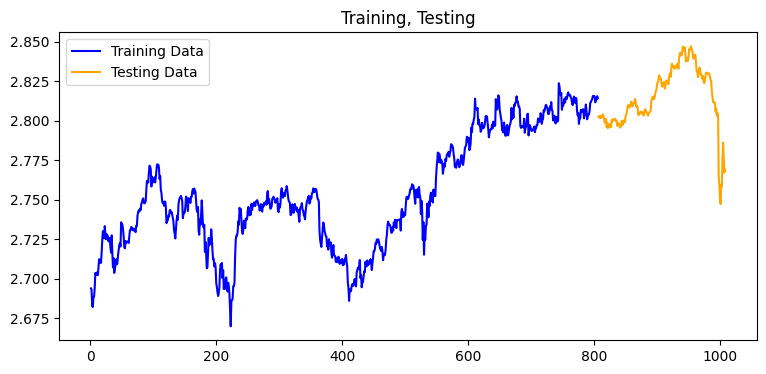

In [ ]:
plt.figure(figsize=(9,4))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Testing Data', color='orange')
plt.title('Training, Testing')
plt.legend()
plt.show()

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import het_arch
from scipy.special import inv_boxcox
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

p_values = range(0, 3)
d_values = [1]
q_values = range(0, 3)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

In [ ]:
results_list = []

for param in pdq_combinations:
    try:
        #FIT MODEL
        model = ARIMA(train_data, order=param)
        model_fit = model.fit()
        #AIC & BIC
        aic = model_fit.aic
        bic = model_fit.bic
        #MAPE
        forecast_boxcox = model_fit.forecast(steps=len(test_data))
        forecast_real = inv_boxcox(forecast_boxcox, best_lambda)
        actual_real = inv_boxcox(test_data, best_lambda)
        mape = mean_absolute_percentage_error(actual_real, forecast_real) * 100
        #SIGNIFIKANSI PARAMETER
        p_values = model_fit.pvalues
        max_p_value = p_values.max()
        all_significant = max_p_value < 0.05
        #HETEROSKEDASTISITAS (ARCH TEST)
        test_hetero = het_arch(model_fit.resid)
        hetero_p_value = test_hetero[1] # Ambil p-value nya
        is_homoscedastic = hetero_p_value > 0.05

        results_list.append({
            'Order': param,
            'AIC': aic,
            'BIC': bic,
            'MAPE (%)': mape,
            'Max_P_Value': max_p_value,
            'All_Signif': all_significant,
            'Hetero_P_Val': hetero_p_value,
            'Homoscedastic': is_homoscedastic
        })
    except Exception as e:
        continue
        print(f"Error for {param}: {e}")
df_results = pd.DataFrame(results_list)
print(df_results)

       Order          AIC          BIC   MAPE (%)    Max_P_Value  All_Signif  \
0  (0, 1, 0) -6416.475697 -6411.784854  10.703435  8.995012e-213        True   
1  (0, 1, 1) -6421.579774 -6412.198089  10.715396   1.103985e-03        True   
2  (0, 1, 2) -6421.838784 -6407.766257  10.720962   4.335681e-02        True   
3  (1, 1, 0) -6422.304941 -6412.923257  10.716622   6.564588e-04        True   
4  (1, 1, 1) -6421.622616 -6407.550089  10.720207   2.123649e-01       False   
5  (1, 1, 2) -6419.556474 -6400.793105  10.721417   7.070270e-01       False   
6  (2, 1, 0) -6421.758461 -6407.685934  10.720580   1.400121e-01       False   
7  (2, 1, 1) -6419.924256 -6401.160887  10.722145   7.668172e-01       False   
8  (2, 1, 2) -6413.493464 -6390.039253  10.713230   1.628632e-01       False   

   Hetero_P_Val  Homoscedastic  
0      0.000001          False  
1      0.000007          False  
2      0.000018          False  
3      0.000009          False  
4      0.000016          False  
5

In [ ]:
final_model = ARIMA(train_data, order=(1, 1, 0))
final_model_fit = final_model.fit()
print(final_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Adj_Close_BoxCox   No. Observations:                  806
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3213.152
Date:                Mon, 08 Dec 2025   AIC                          -6422.305
Time:                        12:43:37   BIC                          -6412.923
Sample:                             0   HQIC                         -6418.702
                                - 806                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0984      0.029     -3.407      0.001      -0.155      -0.042
sigma2      1.998e-05   6.43e-07     31.068      0.000    1.87e-05    2.12e-05
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [ ]:
forecast_boxcox = final_model_fit.forecast(steps=len(test_data))

from scipy.special import inv_boxcox
forecast_real = inv_boxcox(forecast_boxcox, best_lambda)
actual_real = ntflx['Adj Close'][train_size:]

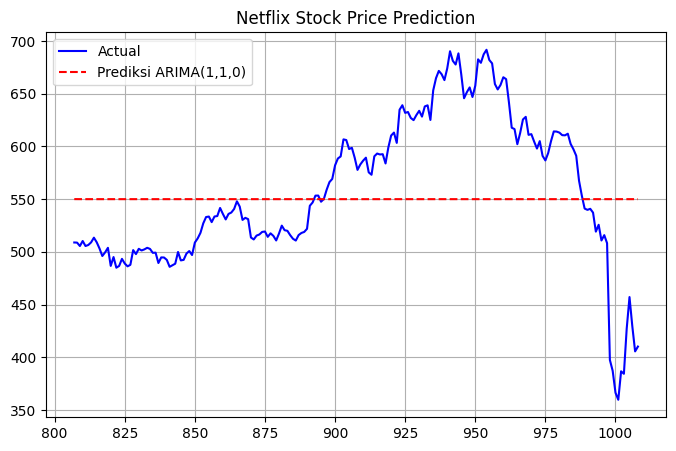

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(actual_real.index, actual_real, label='Actual', color='blue')
plt.plot(actual_real.index, forecast_real, label='Prediksi ARIMA(1,1,0)', color='red', linestyle='--')
plt.title('Netflix Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

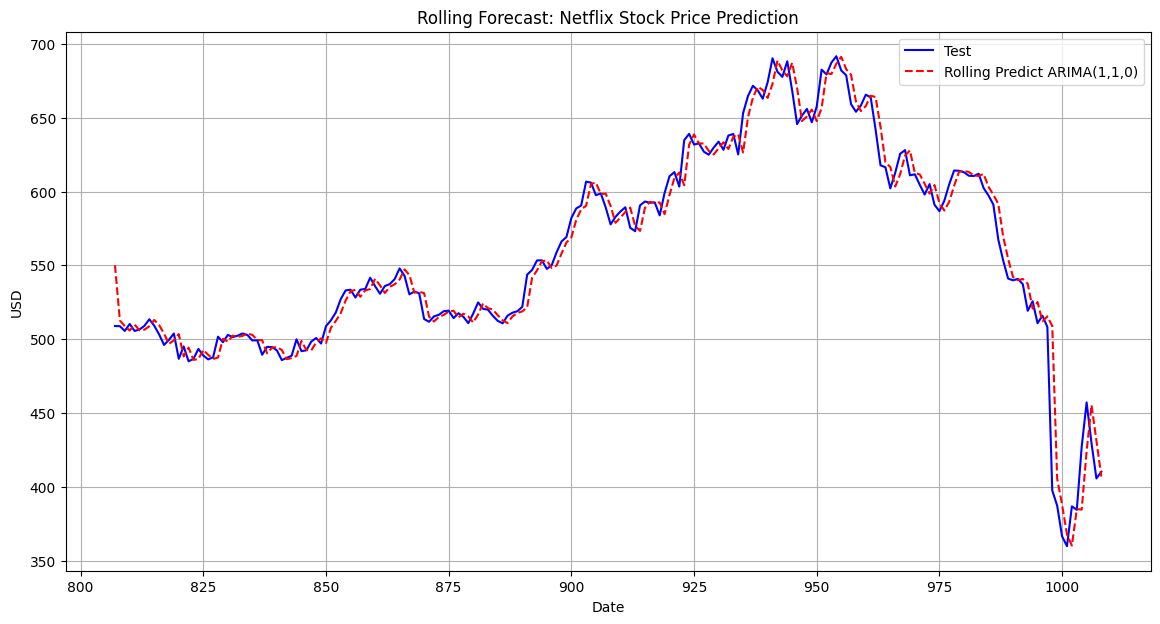

MAPE Rolling Forecast: 1.53%


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from scipy.special import inv_boxcox
import pandas as pd
import matplotlib.pyplot as plt

history = [x for x in train_data]
actual_test_values = [x for x in test_data]
predictions = []

for t in range(len(test_data)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    obs = actual_test_values[t]
    history.append(obs)

forecast_real_rolling = inv_boxcox(predictions, best_lambda)
actual_real = ntflx['Adj Close'][train_size:]

plt.figure(figsize=(14, 7))
plt.plot(actual_real.index, actual_real, label='Test', color='blue')
plt.plot(actual_real.index, forecast_real_rolling, label='Rolling Predict ARIMA(1,1,0)', color='red', linestyle='--')
plt.title('Rolling Forecast: Netflix Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.grid(True)
plt.show()

mape_rolling = mean_absolute_percentage_error(actual_real, forecast_real_rolling) * 100
print(f"MAPE Rolling Forecast: {mape_rolling:.2f}%")

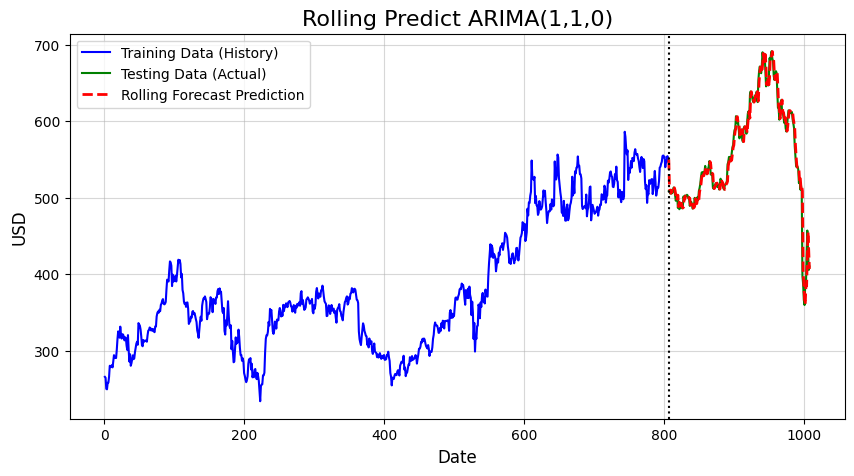

In [ ]:
train_data_plot = ntflx['Adj Close'][:train_size]
test_data_plot = ntflx['Adj Close'][train_size:]

plt.figure(figsize=(10, 5))
plt.plot(train_data_plot.index, train_data_plot,
         label='Training Data (History)', color='blue')
plt.plot(test_data_plot.index, test_data_plot,
         label='Testing Data (Actual)', color='green')
plt.plot(test_data_plot.index, forecast_real_rolling,
         label='Rolling Forecast Prediction', color='red', linestyle='--', linewidth=2)

plt.title('Rolling Predict ARIMA(1,1,0)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('USD', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.axvline(x=test_data_plot.index[0], color='black', linestyle=':', label='Batas Split Data')
plt.show()